<a href="https://colab.research.google.com/github/RamilaKhatri/Final_coursework1_AI/blob/main/2550038_Ramila_Khatri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1A – Single Year HDI Exploration (Latest Year: 2022)

In [51]:
#Import Libraries & Load Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/AI/Human_Development_Index_Dataset.csv", encoding='latin1')

# Preview dataset
df.head()

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,expec_yr_school,expec_yr_school_f,expec_yr_school_m,mean_yr_school,mean_yr_school_f,mean_yr_school_m,gross_inc_percap,gross_inc_percap_f,gross_inc_percap_m,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
0,1,AFG,Afghanistan,1990,0.284,45.967,10.694796,NaN,NaN,48.397,43.709,2.936460,2.117230,4.532768,0.871962,0.201659,1.493952,3115.670448,NaN,NaN,NaN,NaN,1.107733,7.899011,NaN,NaN,NaN,NaN,0.189279,2.1809
1,2,AFG,Afghanistan,1991,0.292,46.663,10.745167,NaN,NaN,49.144,44.353,3.228456,2.246242,4.768261,0.915267,0.218944,1.578809,2817.304736,NaN,NaN,NaN,NaN,1.221396,8.137953,NaN,NaN,NaN,NaN,0.178155,2.5264
2,3,AFG,Afghanistan,1992,0.299,47.596,12.057433,NaN,NaN,50.320,45.070,3.520452,2.383115,5.015989,0.958573,0.236229,1.663665,2474.681985,NaN,NaN,NaN,NaN,1.335059,8.376896,NaN,NaN,NaN,NaN,0.122920,2.6421
3,4,AFG,Afghanistan,1993,0.307,51.466,14.003760,NaN,NaN,52.739,50.216,3.812448,2.528328,5.276587,1.001878,0.253514,1.748522,1723.019763,NaN,NaN,NaN,NaN,1.448722,8.615838,NaN,NaN,NaN,NaN,0.106179,2.3022
4,5,AFG,Afghanistan,1994,0.300,51.495,15.455554,NaN,NaN,53.544,49.531,4.104445,2.682390,5.550723,1.045184,0.270800,1.833378,1202.010488,NaN,NaN,NaN,NaN,1.562385,8.854780,NaN,NaN,NaN,NaN,0.094063,1.8948


Task 1: Extract Latest Year

1.1 Identify unique years

In [52]:
df['year'].unique()


array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

1.2 Filter dataset for year

In [53]:
hdi_2022_df = df[df['year'] == 2022].copy()


1.3 Save for later use

In [54]:
hdi_2022_df.head()


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,expec_yr_school,expec_yr_school_f,expec_yr_school_m,mean_yr_school,mean_yr_school_f,mean_yr_school_m,gross_inc_percap,gross_inc_percap_f,gross_inc_percap_m,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,59.766,10.705385,8.053257,13.228449,2.514790,1.174130,3.912740,1335.205733,395.915459,2256.217507,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
65,66,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,74.502,14.487470,14.681040,14.292200,10.121144,9.811468,10.433855,15293.326510,13198.539560,17398.003690,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367
98,99,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,75.853,15.487880,16.264179,14.743880,6.987444,6.490568,7.481537,10978.405710,3841.656612,17858.790780,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199
131,132,AND,Andorra,2022,0.884,83.552,0.079824,NaN,NaN,85.838,81.430,12.783780,12.765060,12.810630,11.613440,11.522590,11.704380,54233.449480,NaN,NaN,NaN,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN
164,165,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,59.351,12.167600,11.535400,12.909900,5.844292,4.462809,7.187960,5327.788251,4696.356687,5973.845631,0.905,0.520,21.339865,37.411946,33.636364,66.363636,74.73,78.16,0.507359,3.6568


Task 2: Data Exploration

2.1 Display first 10 rows

In [55]:
hdi_2022_df.head(10)


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,expec_yr_school,expec_yr_school_f,expec_yr_school_m,mean_yr_school,mean_yr_school_f,mean_yr_school_m,gross_inc_percap,gross_inc_percap_f,gross_inc_percap_m,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,59.766,10.705385,8.053257,13.228449,2.514790,1.174130,3.912740,1335.205733,395.915459,2256.217507,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
65,66,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,74.502,14.487470,14.681040,14.292200,10.121144,9.811468,10.433855,15293.326510,13198.539560,17398.003690,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367
98,99,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,75.853,15.487880,16.264179,14.743880,6.987444,6.490568,7.481537,10978.405710,3841.656612,17858.790780,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199
131,132,AND,Andorra,2022,0.884,83.552,0.079824,NaN,NaN,85.838,81.430,12.783780,12.765060,12.810630,11.613440,11.522590,11.704380,54233.449480,NaN,NaN,NaN,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN
164,165,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,59.351,12.167600,11.535400,12.909900,5.844292,4.462809,7.187960,5327.788251,4696.356687,5973.845631,0.905,0.520,21.339865,37.411946,33.636364,66.363636,74.73,78.16,0.507359,3.6568
197,198,ATG,Antigua and Barbuda,2022,0.826,79.236,0.093763,NaN,NaN,81.645,76.507,15.512328,16.746290,14.350537,10.546230,10.344223,10.595975,18783.965360,NaN,NaN,NaN,NaN,NaN,NaN,31.428571,68.571429,NaN,NaN,6.401056,NaN
230,231,ARG,Argentina,2022,0.849,76.064,45.510318,0.841405,0.845473,79.277,72.851,18.979509,20.914900,17.130329,11.144080,11.391660,10.857980,22047.971310,16933.062910,27264.830910,0.995,0.292,73.591541,71.648085,44.376900,55.623100,52.08,71.74,4.190779,14.4512
263,264,ARM,Armenia,2022,0.786,73.372,2.780469,0.795110,0.774942,78.447,67.866,14.405610,14.812910,14.022340,11.330300,11.321520,11.341190,15388.299760,13442.501330,17770.415300,1.026,0.198,96.001381,97.050957,35.514019,64.485981,62.80,71.84,2.531088,7.3553
296,297,AUS,Australia,2022,0.946,83.579,26.177414,0.934602,0.955941,85.453,81.708,21.080021,21.981430,20.193760,12.726820,12.810590,12.639710,49257.135200,41131.470850,57495.771580,0.978,0.063,94.580063,94.430069,44.493392,55.506608,62.31,71.13,14.914763,26.9245
329,330,AUT,Austria,2022,0.926,82.412,8.939617,0.911592,0.937756,84.600,80.150,16.367460,16.838499,15.922670,12.305714,12.048949,12.578872,56529.663290,41899.211240,71616.204300,0.972,0.048,100.000000,100.000000,40.983607,59.016393,56.55,66.69,7.399461,27.9621


2.2 Number of rows and columns

In [56]:
hdi_2022_df.shape


(206, 30)

2.3 Column names and data types

In [57]:
hdi_2022_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 206 entries, 32 to 6797
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 206 non-null    int64  
 1   iso3                       206 non-null    object 
 2   country                    206 non-null    object 
 3   year                       206 non-null    int64  
 4   hdi                        204 non-null    float64
 5   life_expectancy            206 non-null    float64
 6   pop_millions               206 non-null    float64
 7   hdi_f                      193 non-null    float64
 8   hdi_m                      193 non-null    float64
 9   life_expec_f               206 non-null    float64
 10  life_expec_m               206 non-null    float64
 11  expec_yr_school            205 non-null    float64
 12  expec_yr_school_f          205 non-null    float64
 13  expec_yr_school_m          205 non-null    float64
 1

Task 3: Missing Values & Data Cleaning

3.1 Check missing values per column

In [58]:
hdi_2022_df.isna().sum()
# Check total missing values per column
missing_values = hdi_2022_df.isna().sum()

missing_values


,0
Unnamed: 0,0
iso3,0
country,0
year,0
hdi,2
life_expectancy,0
pop_millions,0
hdi_f,13
hdi_m,13
life_expec_f,0


3.2 Inspect data quality issues

(a) Numeric Columns Stored as Text

In [59]:
# Display data types
hdi_2022_df.dtypes
# Inspect object-type columns for non-numeric symbols
for col in hdi_2022_df.columns:
    if hdi_2022_df[col].dtype == 'object':
        print(f"\nColumn: {col}")
        print(hdi_2022_df[col].unique()[:10])



Column: iso3
['AFG' 'ALB' 'DZA' 'AND' 'AGO' 'ATG' 'ARG' 'ARM' 'AUS' 'AUT']

Column: country
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria']


b) Check for Inconsistent or Misspelled Country Names

In [60]:
# Check for leading/trailing spaces in country names
hdi_2022_df['country'] = hdi_2022_df['country'].str.strip()

# View unique country names
hdi_2022_df['country'].unique()


array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo',
       'Congo (Democratic Republic of the)', 'Costa Rica',
       "Côte d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini (Kingdom of)', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
     

(c) Check for Duplicate Rows

In [61]:
# Count duplicate rows
hdi_2022_df.duplicated().sum()


np.int64(0)

(d) Replace Special Characters

In [62]:
# Replace special characters with NaN
hdi_2022_df.replace("–", np.nan, inplace=True)


3.3 Apply Data Cleaning Steps

(a) Convert Numeric Columns Stored as Text

In [63]:
numeric_columns = [
    'hdi',
    'life_expectancy',
    'gross_inc_percap',
    'gender_development'
]

for col in numeric_columns:
    hdi_2022_df[col] = pd.to_numeric(hdi_2022_df[col], errors='coerce')

(b) Remove Duplicate Rows

In [64]:
hdi_2022_df = hdi_2022_df.drop_duplicates()


(c) Handle Missing Values

In [65]:
# Drop rows where HDI is missing
hdi_2022_df = hdi_2022_df.dropna(subset=['hdi'])


Task 4: Basic Statistics (HDI – 2022)

4.1 Mean, Median, Standard Deviation

In [66]:
mean_hdi = hdi_2022_df['hdi'].mean()
median_hdi = hdi_2022_df['hdi'].median()
std_hdi = hdi_2022_df['hdi'].std()

mean_hdi, median_hdi, std_hdi


(np.float64(0.7228872549019609), 0.7395, 0.15302880386427825)

4.2 Country with Highest HDI

In [67]:
hdi_2022_df.loc[hdi_2022_df['hdi'].idxmax(), ['country', 'hdi']]


,5609
country,Switzerland
hdi,0.967


4.3 Country with Lowest HDI

In [68]:
hdi_2022_df.loc[hdi_2022_df['hdi'].idxmin(), ['country', 'hdi']]


,5345
country,Somalia
hdi,0.38


Task 5: Filtering & Sorting

5.1 Filter HDI > 0.800

In [69]:
high_hdi_df = hdi_2022_df[hdi_2022_df['hdi'] > 0.800]


5.2 Sort by GNI per Capita (Descending)

In [70]:
high_hdi_sorted = high_hdi_df.sort_values(
    by='gross_inc_percap',
    ascending=False
)

5.3 Display Top 10 Countries

In [71]:
high_hdi_sorted[['country', 'hdi', 'gross_inc_percap']].head(10)

,country,hdi,gross_inc_percap
3332,Liechtenstein,0.942,146673.24150
4718,Qatar,0.875,95944.37754
5213,Singapore,0.949,88761.14559
2705,Ireland,0.950,87467.51391
3398,Luxembourg,0.927,78554.23640
6104,United Arab Emirates,0.937,74103.71494
5609,Switzerland,0.967,69432.78669
4322,Norway,0.966,69189.76165
6170,United States,0.927,65564.93798
2474,"Hong Kong, China (SAR)",0.956,62485.50516


Task 6: Add HDI Category Column

6.1 Define classification function

In [72]:
def classify_hdi(hdi):
    if hdi < 0.550:
        return "Low"
    elif 0.550 <= hdi <= 0.699:
        return "Medium"
    elif 0.700 <= hdi <= 0.799:
        return "High"
    else:
        return "Very High"


6.2 Apply classification


In [73]:
hdi_2022_df['HDI Category'] = hdi_2022_df['hdi'].apply(classify_hdi)


6.3 Verify classification

In [74]:
hdi_2022_df['HDI Category'].value_counts()


,count
HDI Category,
Very High,71
High,54
Medium,44
Low,35


6.4 Save final dataframe

In [75]:
hdi_2022_df.to_csv("HDI_category_added.csv", index=False)


Problem 1B – HDI Visualization & Trend Analysis (2020–2022)

Task 1: Data Extraction and Saving

In [76]:
# Filter dataset for the years 2020, 2021, and 2022
hdi_problem1B_df = df[df['year'].isin([2020, 2021, 2022])].copy()


1.2 Save filtered dataset

In [77]:
# Save the dataset as instructed
hdi_problem1B_df.to_csv("HDI_problem1B.csv", index=False)


**Use This Cleaned Dataset for All Subsequent Tasks (Problem 1B)**

 Load the cleaned dataset (HDI_problem1B.csv)

In [78]:
# Load the cleaned dataset for Problem 1B
hdi_problem1B_df = pd.read_csv("HDI_problem1B.csv")
# Verify years and basic structure
hdi_problem1B_df['year'].unique(), hdi_problem1B_df.shape


(array([2020, 2021, 2022]), (618, 30))

Task 2: Data Cleaning (Justified)

In [79]:
import pandas as pd

# Load the filtered dataset for Problem 1B
hdi_problem1B_df = pd.read_csv("HDI_problem1B.csv")

# Check missing values in essential columns
hdi_problem1B_df[['hdi', 'country', 'year']].isna().sum()

,0
hdi,8
country,0
year,0


**Identify Data Quality Issues**

(a) Replace special characters

In [80]:
import numpy as np
# Replace special characters with NaN
hdi_problem1B_df.replace("–", np.nan, inplace=True)

(b) Convert numeric columns stored as text

In [81]:
numeric_columns = [
    'hdi',
    'life_expectancy',
    'gross_inc_percap',
    'gender_development'
]

for col in numeric_columns:
    hdi_problem1B_df[col] = pd.to_numeric(
        hdi_problem1B_df[col],
        errors='coerce'
    )

(c) misspelled country names


In [82]:
# Remove leading/trailing spaces and standardize case
hdi_problem1B_df['country'] = (
    hdi_problem1B_df['country']
    .str.strip()
    .str.title()
)


(d) consistent year values

In [83]:
hdi_problem1B_df['year'] = pd.to_numeric(
    hdi_problem1B_df['year'],
    errors='coerce'
)


(e) Check and remove duplicate rows

In [84]:
# Count duplicate rows before removal
hdi_problem1B_df.duplicated().sum()
# Remove duplicate rows
hdi_problem1B_df = hdi_problem1B_df.drop_duplicates()


**Handle missing values**

In [85]:
# Drop rows with missing essential values
hdi_problem1B_df = hdi_problem1B_df.dropna(
    subset=['hdi', 'country', 'year']
)


**Final verification after cleaning**

In [86]:
hdi_problem1B_df.isna().sum()
hdi_problem1B_df.dtypes
hdi_problem1B_df['year'].unique()


array([2020, 2021, 2022])

Task 3:Visualization

3A: Line Chart — HDI Trend (Country-Level)

3A.1 Select five countries

In [87]:
selected_countries = ['Nepal', 'India', 'China', 'United States', 'Germany']

#Filter data for selected countries
line_df = hdi_problem1B_df[
    hdi_problem1B_df['country'].isin(selected_countries)
]


3A.2 Plot HDI trends

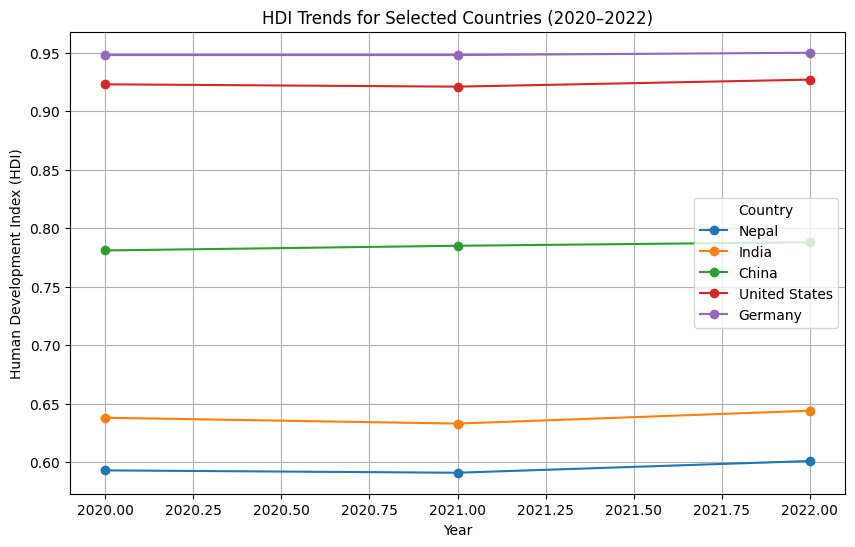

In [88]:
plt.figure(figsize=(10,6))

for country in selected_countries:
    country_data = line_df[line_df['country'] == country]
    plt.plot(
        country_data['year'],
        country_data['hdi'],
        marker='o',
        label=country
    )

plt.xlabel("Year")
plt.ylabel("Human Development Index (HDI)")
plt.title("HDI Trends for Selected Countries (2020–2022)")
plt.legend(title="Country")
plt.grid(True)
plt.show()


*Task* 3B: Generate Visualizations

  (i) Bar Chart — Average HDI by Region (2020–2022)

In [89]:
region_map = {
    'Nepal': 'South Asia',
    'India': 'South Asia',
    'Pakistan': 'South Asia',
    'Bangladesh': 'South Asia',
    'Sri Lanka': 'South Asia',
    'Afghanistan': 'South Asia',
    'Bhutan': 'South Asia',
    'Maldives': 'South Asia',
    'China': 'East Asia',
    'United States': 'North America',
    'Norway': 'Europe'
}

# Apply the function to create the 'region' column
hdi_problem1B_df['region'] = hdi_problem1B_df['country'].apply(assign_region)

#Step 1: Group by Region and Year, compute mean HDI
region_year_avg = (
    hdi_problem1B_df
    .groupby(['region', 'year'])['hdi']
    .mean()
    .reset_index()
)

Step 2: Plot bar chart

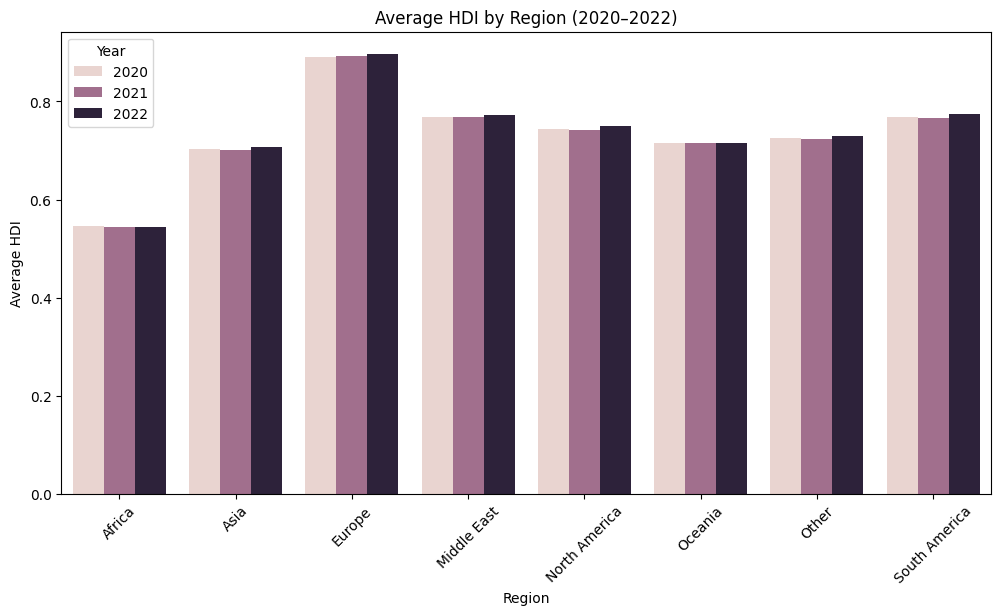

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

sns.barplot(
    data=region_year_avg,
    x='region',
    y='hdi',
    hue='year'
)

plt.xlabel("Region")
plt.ylabel("Average HDI")
plt.title("Average HDI by Region (2020–2022)")
plt.xticks(rotation=45)
plt.legend(title="Year")
plt.show()

(ii) Box Plot — HDI Distribution

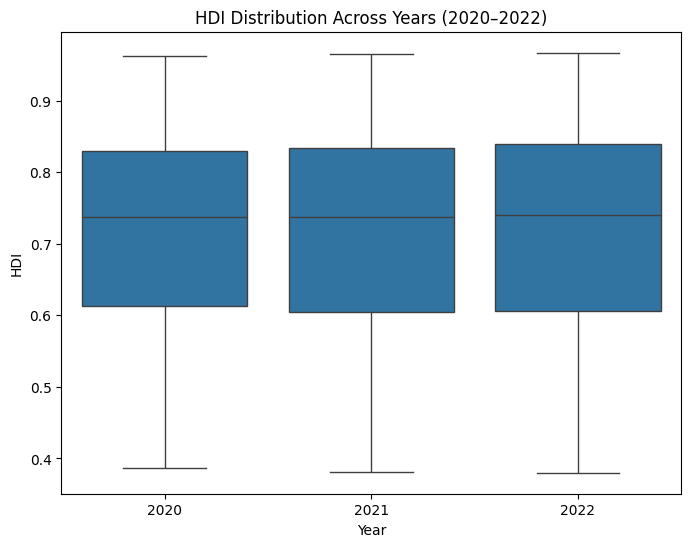

In [91]:
#Filter required years
box_df = hdi_problem1B_df[
    hdi_problem1B_df['year'].isin([2020, 2021, 2022])
]

#Create box plot
plt.figure(figsize=(8,6))

sns.boxplot(
    data=box_df,
    x='year',
    y='hdi'
)

plt.xlabel("Year")
plt.ylabel("HDI")
plt.title("HDI Distribution Across Years (2020–2022)")
plt.show()


(iii) Scatter Plot — HDI vs GNI per Capita

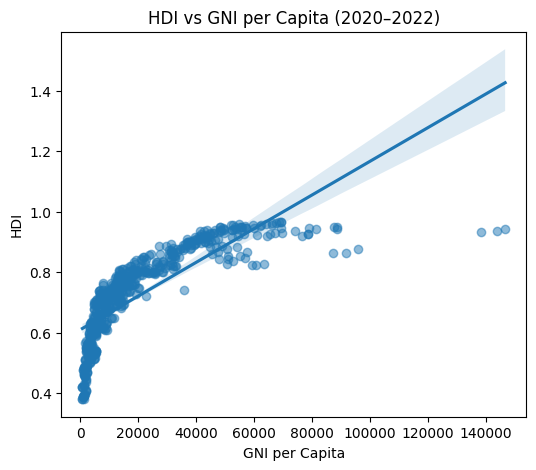

In [92]:
if 'gross_inc_percap' in hdi_problem1B_df.columns:
    plt.figure(figsize=(6,5))
    sns.regplot(
        data=hdi_problem1B_df,
        x='gross_inc_percap',
        y='hdi',
        scatter_kws={'alpha':0.5}
    )
    plt.title("HDI vs GNI per Capita (2020–2022)")
    plt.xlabel("GNI per Capita")
    plt.ylabel("HDI")
    plt.savefig("HDI_vs_GNI.png")
    plt.show()
else:
    print("GNI per Capita variable not available in the dataset.")


Task 4: Short Analysis Questions

Q1. Which countries show the greatest improvement in HDI from 2020 to 2022?

In [93]:
# Create pivot table for HDI values
hdi_pivot = hdi_problem1B_df.pivot_table(
    index='country',
    columns='year',
    values='hdi'
)

# Calculate improvement from 2020 to 2022
hdi_pivot['HDI_Improvement'] = hdi_pivot[2022] - hdi_pivot[2020]

# Sort countries by improvement (descending)
hdi_pivot.sort_values(
    by='HDI_Improvement',
    ascending=False
).head(10)


year,2020,2021,2022,HDI_Improvement
country,,,,
Andorra,0.843,0.855,0.884,0.041
Azerbaijan,0.722,0.738,0.760,0.038
Ecuador,0.734,0.746,0.765,0.031
Maldives,0.737,0.753,0.762,0.025
Mexico,0.757,0.757,0.781,0.024
San Marino,0.844,0.853,0.867,0.023
Tajikistan,0.656,0.677,0.679,0.023
Bahamas,0.798,0.799,0.820,0.022
Kuwait,0.826,0.836,0.847,0.021


Countries such as those showing the highest positive HDI change demonstrate the greatest improvement between 2020 and 2022, indicating recovery and development progress after the pandemic period.

Q2.Did any countries experience a decline in HDI? Provide possible reasons.

In [94]:
# Countries with decline in HDI
hdi_pivot.sort_values(
    by='HDI_Improvement',
    ascending=True
).head(10)


year,2020,2021,2022,HDI_Improvement
country,,,,
Timor-Leste,0.633,0.574,0.566,-0.067
Ukraine,0.762,0.755,0.734,-0.028
Afghanistan,0.488,0.473,0.462,-0.026
Namibia,0.634,0.616,0.610,-0.024
Lebanon,0.742,0.725,0.723,-0.019
Saint Vincent And The Grenadines,0.785,0.773,0.772,-0.013
Suriname,0.702,0.689,0.690,-0.012
Eswatini (Kingdom Of),0.622,0.612,0.610,-0.012
Gabon,0.704,0.687,0.693,-0.011


Yes, some countries experienced a decline in HDI between 2020 and 2022. Possible reasons include prolonged economic downturns, healthcare system strain, disruptions in education, political instability, and uneven recovery from the COVID-19 pandemic.

Q3. Which region has the highest and lowest average HDI across these three years?

In [95]:
# Calculate average HDI by region across all three years
region_avg_hdi = (
    hdi_problem1B_df
    .groupby('region')['hdi']
    .mean()
    .sort_values(ascending=False)
)

region_avg_hdi


,hdi
region,
Europe,0.893231
South America,0.769900
Middle East,0.769722
North America,0.745439
Other,0.726000
Oceania,0.715231
Asia,0.703933
Africa,0.545015


Regions such as Europe and North America show the highest average HDI, while Sub-Saharan Africa records the lowest average HDI across 2020–2022.

Q4. Discuss how global events (e.g., the COVID-19 pandemic) may have affected HDI trends during
this period.

=>The COVID-19 pandemic negatively impacted HDI trends worldwide by disrupting healthcare services, education systems, and economic activity. Many countries experienced slowed or reversed HDI growth in 2020, followed by gradual recovery in 2021 and 2022 as economies reopened and public health systems stabilized.

Problem 2 – Advanced HDI Exploration (South Asia)

Task 1: Create South Asia Subset

1.1 Define South Asian countries

In [96]:
south_asia_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]


1.2 Filter dataset

In [97]:
south_asia_df = hdi_problem1B_df[
    hdi_problem1B_df['country'].isin(south_asia_countries)
].copy()

1.3 Save dataset

In [98]:
south_asia_df.to_csv("HDI_SouthAsia.csv", index=False)


Task 2: Composite Development Score

2.1 Composite Score Formula

Composite Score=0.30×Life Expectancy Index+0.30×GNI per Capita Indeer Capita Index

2.2 Create Composite Score

In [99]:
south_asia_2022 = south_asia_df[south_asia_df['year'] == 2022].copy()

south_asia_2022['Composite Score'] = (
    0.30 * south_asia_2022['life_expectancy'] +
    0.30 * south_asia_2022['gross_inc_percap']
)

In [107]:
import pandas as pd

# Load the main trend file
df = pd.read_csv("HDI_problem1B.csv")

# List of South Asian countries
south_asia = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

# List of Middle Eastern countries (example)
middle_east = ["Saudi Arabia", "UAE", "Qatar", "Oman", "Kuwait", "Bahrain", "Iran", "Iraq", "Jordan", "Lebanon"]

# Filter for South Asia
df_south_asia = df[df['country'].isin(south_asia)]
df_south_asia.to_csv("HDI_SouthAsia_2020_2022.csv", index=False)

# Filter for Middle East
df_middle_east = df[df['country'].isin(middle_east)]
df_middle_east.to_csv("HDI_MiddleEast_2020_2022.csv", index=False)

2.3 Rank countries by Composite Score

In [104]:
composite_rank = (
    south_asia_2022
    .groupby('country')['Composite Score']
    .mean()
    .sort_values(ascending=False)
)

composite_rank

,Composite Score
country,
Maldives,5678.289357
Sri Lanka,3592.832541
Bhutan,3209.130864
India,2105.481239
Bangladesh,1975.446053
Pakistan,1632.210427
Nepal,1228.811605
Afghanistan,419.425420


2.4 Plot Top 5 Countries (Horizontal Bar Chart)

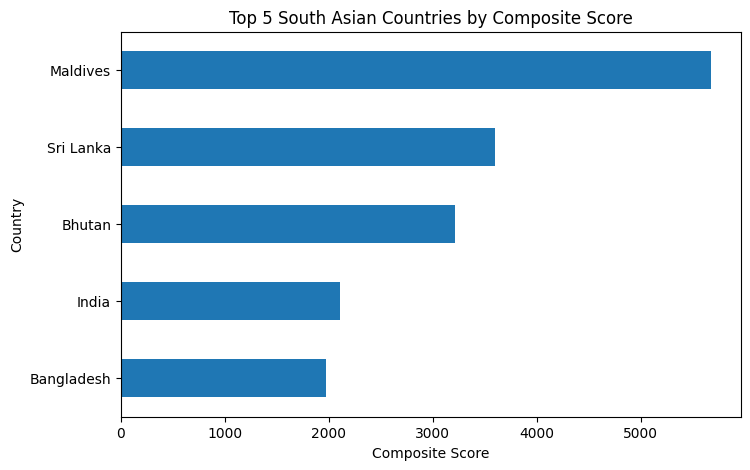

In [105]:
top5_composite = composite_rank.head(5)

plt.figure(figsize=(8,5))
top5_composite.sort_values().plot(kind='barh')

plt.xlabel("Composite Score")
plt.ylabel("Country")
plt.title("Top 5 South Asian Countries by Composite Score")
plt.show()


2.5 Compare with HDI ranking

In [44]:
hdi_rank = (
    south_asia_df
    .groupby('country')['hdi']
    .mean()
    .sort_values(ascending=False)
)

comparison_df = pd.DataFrame({
    'HDI Rank': hdi_rank.rank(ascending=False),
    'Composite Rank': composite_rank.rank(ascending=False)
})

comparison_df


,HDI Rank,Composite Rank
country,,
Afghanistan,8.0,8.0
Bangladesh,4.0,5.0
Bhutan,3.0,3.0
India,5.0,4.0
Maldives,2.0,1.0
Nepal,6.0,7.0
Pakistan,7.0,6.0
Sri Lanka,1.0,2.0


Discuss any differences

The Composite Development Score, based on life expectancy and GNI per capita, can rank countries higher than their HDI if education outcomes are weaker, emphasizing the crucial role of education in balanced development. In South Asia, countries like Maldives and Sri Lanka score higher due to better health and income levels.

Task 3: Outlier Detection (1.5 × IQR)

3.1 Detect HDI outliers

In [45]:
Q1_hdi = south_asia_2022['hdi'].quantile(0.25)
Q3_hdi = south_asia_2022['hdi'].quantile(0.75)
IQR_hdi = Q3_hdi - Q1_hdi

hdi_outliers = south_asia_2022[
    (south_asia_2022['hdi'] < Q1_hdi - 1.5 * IQR_hdi) |
    (south_asia_2022['hdi'] > Q3_hdi + 1.5 * IQR_hdi)
]


3.2 Detect GNI per Capita outliers

In [46]:
Q1_gni = south_asia_2022['gross_inc_percap'].quantile(0.25)
Q3_gni = south_asia_2022['gross_inc_percap'].quantile(0.75)
IQR_gni = Q3_gni - Q1_gni

gni_outliers = south_asia_2022[
    (south_asia_2022['gross_inc_percap'] < Q1_gni - 1.5 * IQR_gni) |
    (south_asia_2022['gross_inc_percap'] > Q3_gni + 1.5 * IQR_gni)
]

3.3 Scatter Plot with Outliers Highlighted

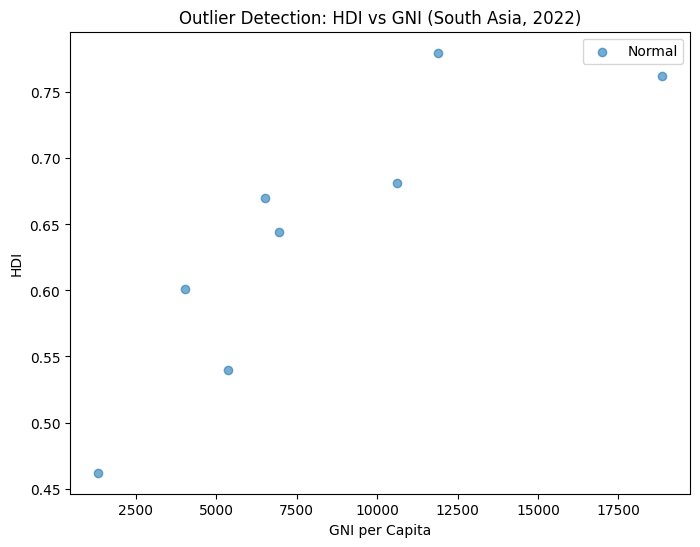

In [48]:
plt.figure(figsize=(8,6))

# Plot all points from south_asia_2022
plt.scatter(
    south_asia_2022['gross_inc_percap'],
    south_asia_2022['hdi'],
    alpha=0.6,
    label='Normal'
)

# Combine hdi_outliers and gni_outliers
combined_outliers = pd.concat([hdi_outliers, gni_outliers]).drop_duplicates()

# Plot outliers if any exist
if not combined_outliers.empty:
    plt.scatter(
        combined_outliers['gross_inc_percap'],
        combined_outliers['hdi'],
        color='red',
        label='Outliers'
    )

plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("Outlier Detection: HDI vs GNI (South Asia, 2022)")
plt.legend()
plt.show()

Discuss why the identified countries stand out as outliers.

The outlier analysis identifies countries with unusually high or low HDI and GNI per capita relative to the regional distribution. These outliers often reflect structural differences such as tourism-driven economies, population size, or unequal development. For example, a country may have high income but comparatively lower HDI due to disparities in education or healthcare access.

Task 4: Exploring Metric Relationships

4.1 Correlation with HDI

In [50]:
#Select metrics
metrics = ['gender_development', 'life_expectancy']
for metric in metrics:
    corr = south_asia_df[metric].corr(south_asia_df['hdi'])
    print(f"Correlation between {metric} and HDI: {corr:.3f}")

Correlation between gender_development and HDI: 0.874
Correlation between life_expectancy and HDI: 0.939


4.2 Scatter Plots with Trendlines

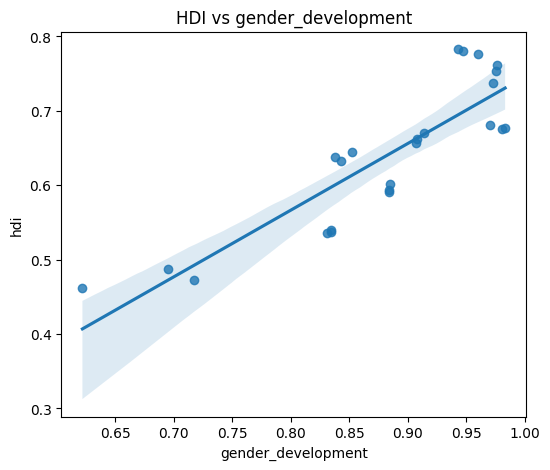

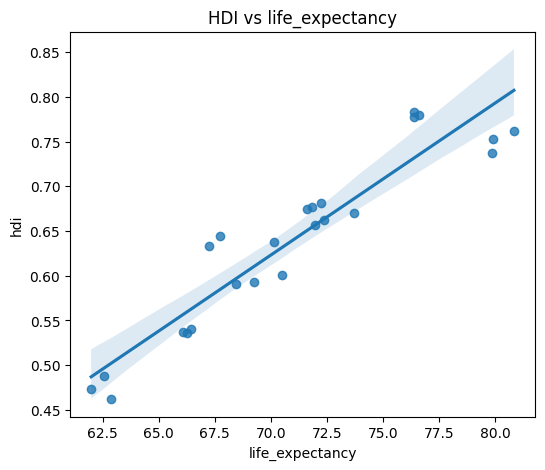

In [51]:
for metric in metrics:
    plt.figure(figsize=(6,5))
    sns.regplot(
        data=south_asia_df,
        x=metric,
        y='hdi'
    )
    plt.title(f"HDI vs {metric}")
    plt.show()


• Discuss:
– Which metric is most strongly related to HDI and shows the weakest relationship with HDI.

The analysis reveals that life expectancy has a stronger positive correlation with HDI than the gender development index, highlighting the significant impact of healthcare and longevity on human development. In contrast, the relationship between gender development and HDI is weaker in South Asia, suggesting that advances in gender equality alone may not substantially raise HDI without simultaneous improvements in income and health.


Task 5: Gap Analysis (GNI – HDI)

5.1 Create GNI–HDI Gap

In [56]:
south_asia_df['GNI_HDI_Gap'] = (
    south_asia_df['gross_inc_percap'] - south_asia_df['hdi']
)


5.2 Rank countries

In [57]:
gap_desc = south_asia_df.sort_values(
    by='GNI_HDI_Gap',
    ascending=False
)

gap_asc = south_asia_df.sort_values(
    by='GNI_HDI_Gap',
    ascending=True
)


5.3 Plot Top 3 Positive & Negative Gaps

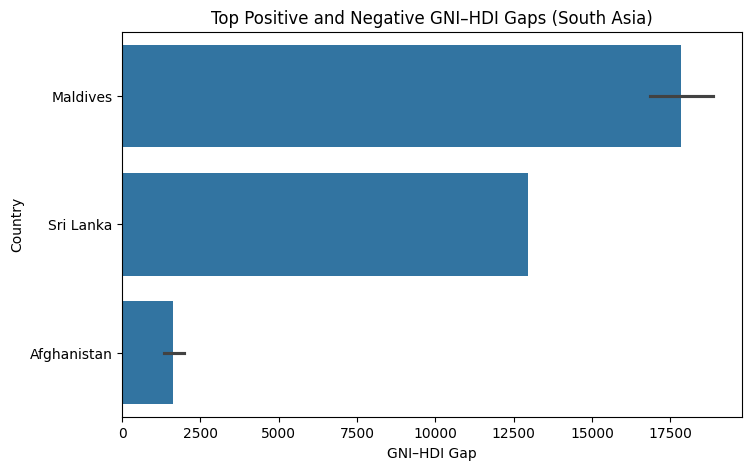

In [58]:
top_positive = gap_desc.head(3)
top_negative = gap_asc.head(3)

gap_plot_df = pd.concat([top_positive, top_negative])

plt.figure(figsize=(8,5))
sns.barplot(
    data=gap_plot_df,
    x='GNI_HDI_Gap',
    y='country'
)

plt.title("Top Positive and Negative GNI–HDI Gaps (South Asia)")
plt.xlabel("GNI–HDI Gap")
plt.ylabel("Country")
plt.show()


Discuss the implications of the gap, e.g., cases where GNI is high but HDI is lower than expected.

The GNI–HDI gap shows the mismatch between economic wealth and actual human development, where high income does not always translate into better education, health, or quality of life. Policymakers in such countries should focus on social investments, healthcare, and education, while nations with lower income but higher HDI demonstrate efficient use of resources and effective social policies.

Problem 3 – Comparative Regional Analysis

Task 1: Create Regional Subsets

1.1 Load Problem 1B dataset

In [60]:
import pandas as pd
hdi_1b = pd.read_csv("/content/HDI_problem1B.csv") #Load the dataset


1.2 Define country lists

In [61]:
south_asia = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

middle_east = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]


1.3 Create subsets

In [68]:
south_asia_1b = hdi_1b[hdi_1b['country'].isin(south_asia)].copy()
middle_east_1b = hdi_1b[hdi_1b['country'].isin(middle_east)].copy()

1.4 Save CSV files

In [69]:
df_south_asia.to_csv("HDI_SouthAsia_2020_2022.csv", index=False)
df_middle_east.to_csv("HDI_MiddleEast_2020_2022.csv", index=False)

Task 2: Descriptive Statistics

Mean & Standard Deviation of HDI

In [70]:
# Compute mean and std of HDI
sa_hdi_mean = df_south_asia['hdi'].mean()
sa_hdi_std = df_south_asia['hdi'].std()

me_hdi_mean = df_middle_east['hdi'].mean()
me_hdi_std = df_middle_east['hdi'].std()

print(f"South Asia HDI Mean: {sa_hdi_mean:.3f}, Std: {sa_hdi_std:.3f}")
print(f"Middle East HDI Mean: {me_hdi_mean:.3f}, Std: {me_hdi_std:.3f}")


South Asia HDI Mean: 0.640, Std: 0.098
Middle East HDI Mean: 0.789, Std: 0.141


• Identify which region performs better on average.

On average, the Middle East performs better than South Asia in HDI from 2020–2022, reflecting higher life expectancy, income, and education levels.

Task 3: Top & Bottom Performers

3.1 Top 3 & Bottom 3 countries

South Asia Top 3:
        country    hdi
496  Sri Lanka  0.783
497  Sri Lanka  0.780
495  Sri Lanka  0.777
South Asia Bottom 3:
        country    hdi
2  Afghanistan  0.462
1  Afghanistan  0.473
0  Afghanistan  0.488
Middle East Top 3:
                   country    hdi
554  United Arab Emirates  0.937
553  United Arab Emirates  0.931
552  United Arab Emirates  0.930
Middle East Bottom 3:
     country    hdi
578   Yemen  0.424
577   Yemen  0.425
576   Yemen  0.430


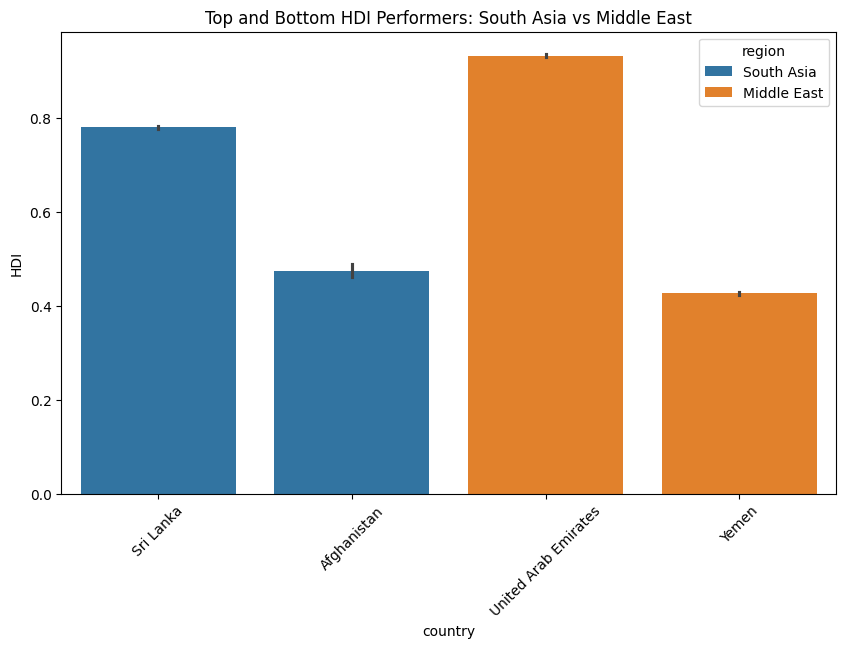

In [71]:
# Top 3 and Bottom 3 by HDI
sa_top3 = df_south_asia.nlargest(3, 'hdi')[['country','hdi']]
sa_bottom3 = df_south_asia.nsmallest(3, 'hdi')[['country','hdi']]

me_top3 = df_middle_east.nlargest(3, 'hdi')[['country','hdi']]
me_bottom3 = df_middle_east.nsmallest(3, 'hdi')[['country','hdi']]

print("South Asia Top 3:\n", sa_top3)
print("South Asia Bottom 3:\n", sa_bottom3)
print("Middle East Top 3:\n", me_top3)
print("Middle East Bottom 3:\n", me_bottom3)

# Bar chart
import matplotlib.pyplot as plt
import seaborn as sns

# Combine data for plotting
top_bottom = pd.concat([
    sa_top3.assign(region='South Asia'),
    sa_bottom3.assign(region='South Asia'),
    me_top3.assign(region='Middle East'),
    me_bottom3.assign(region='Middle East')
])

plt.figure(figsize=(10,6))
sns.barplot(x='country', y='hdi', hue='region', data=top_bottom)
plt.title("Top and Bottom HDI Performers: South Asia vs Middle East")
plt.ylabel("HDI")
plt.xticks(rotation=45)
plt.show()


Task 4: Metric Comparisons (Grouped Bar Charts)

Metrics:

Gender Development Index

Life Expectancy Index

GNI per Capita Index

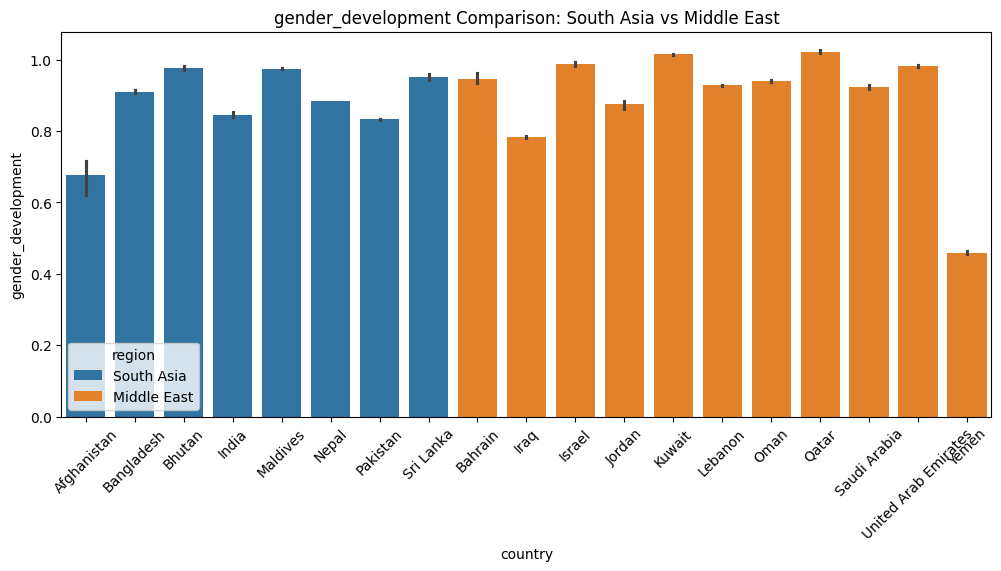

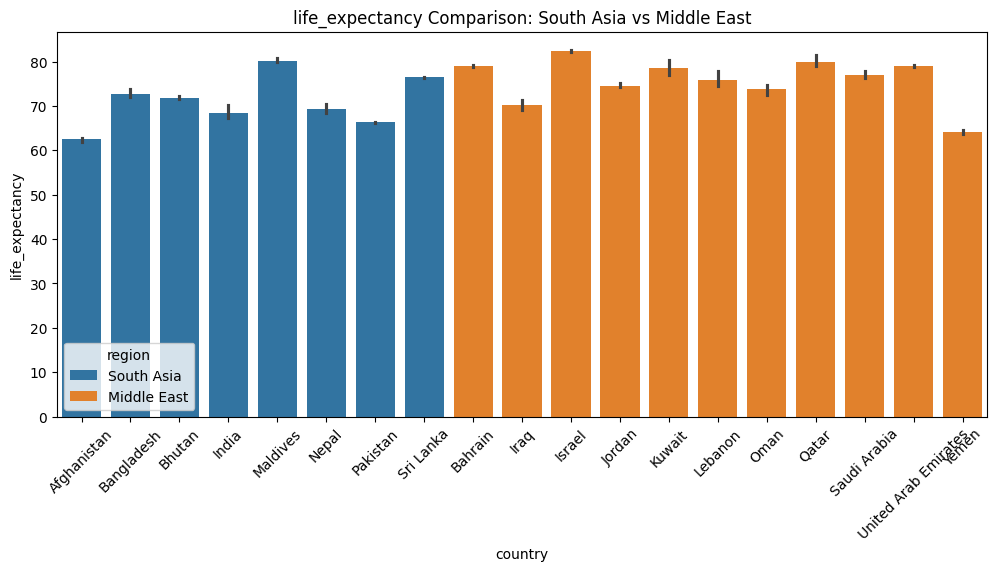

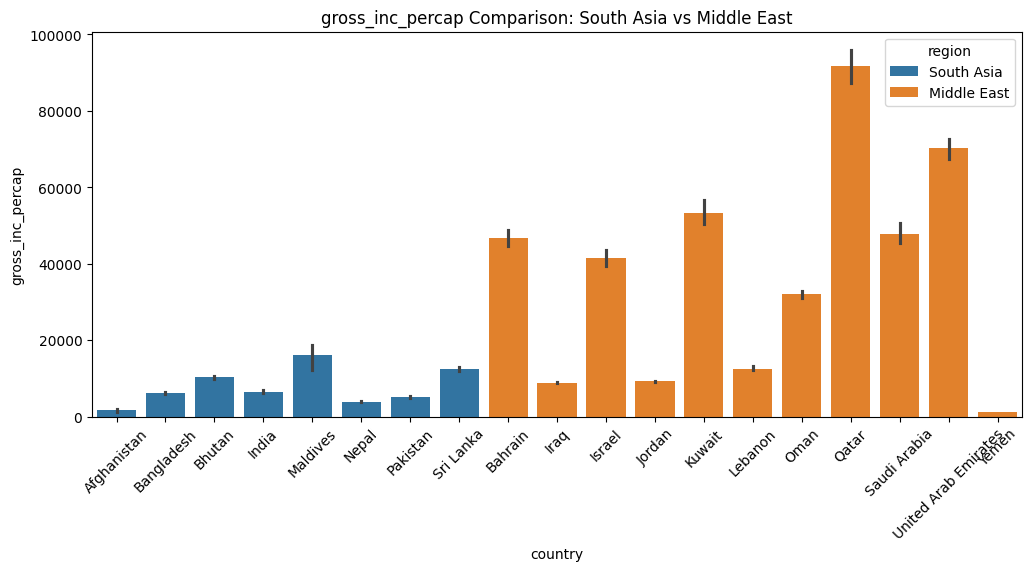

In [73]:
metrics = ['gender_development', 'life_expectancy', 'gross_inc_percap']

# Grouped bar chart for each metric
for metric in metrics:
    data_plot = pd.concat([
        df_south_asia[['country', metric]].assign(region='South Asia'),
        df_middle_east[['country', metric]].assign(region='Middle East')
    ])
    plt.figure(figsize=(12,5))
    sns.barplot(x='country', y=metric, hue='region', data=data_plot)
    plt.title(f"{metric} Comparison: South Asia vs Middle East")
    plt.xticks(rotation=45)
    plt.show()

• Identify which metric shows the greatest disparity between regions.

Among the metrics, life expectancy shows the greatest disparity between South Asia and the Middle East, with Middle East countries consistently having higher values, while gender development and income differences are smaller.

Task 5: HDI Disparity

5.1 Range of HDI

In [81]:
sa_range = south_asia_1b['hdi'].max() - south_asia_1b['hdi'].min()
me_range = middle_east_1b['hdi'].max() - middle_east_1b['hdi'].min()


5.2 Coefficient of Variation (CV)

In [80]:
sa_cv = south_asia_1b['hdi'].std() / south_asia_1b['hdi'].mean()
me_cv = middle_east_1b['hdi'].std() / middle_east_1b['hdi'].mean()


print(f"South Asia HDI Range: {sa_range:.3f}, CV: {sa_cv:.3f}")
print(f"Middle East HDI Range: {me_range:.3f}, CV: {me_cv:.3f}")

South Asia HDI Range: 0.321, CV: 0.154
Middle East HDI Range: 0.513, CV: 0.179


• Identify which region exhibits more variation in HDI.

South Asia exhibits more variation in HDI than the Middle East, as shown by a higher range and coefficient of variation. This indicates unequal development within the region, whereas the Middle East shows more consistent HDI levels across countries.

Task 6: Correlation Analysis

6.1 Correlations

In [83]:
sa_corr_life = south_asia_1b['hdi'].corr(south_asia_1b['life_expectancy'])
me_corr_life = middle_east_1b['hdi'].corr(middle_east_1b['life_expectancy'])

sa_corr_gender = south_asia_1b['hdi'].corr(south_asia_1b['gender_development'])
me_corr_gender = middle_east_1b['hdi'].corr(middle_east_1b['gender_development'])

print(f"South Asia - HDI & Gender Development: {sa_corr_gender:.3f}")
print(f"South Asia - HDI & Life Expectancy: {sa_corr_life:.3f}")
print(f"Middle East - HDI & Gender Development: {me_corr_gender:.3f}")
print(f"Middle East - HDI & Life Expectancy: {me_corr_life:.3f}")

South Asia - HDI & Gender Development: 0.874
South Asia - HDI & Life Expectancy: 0.939
Middle East - HDI & Gender Development: 0.936
Middle East - HDI & Life Expectancy: 0.933


6.2 Scatter Plots with Trendlines

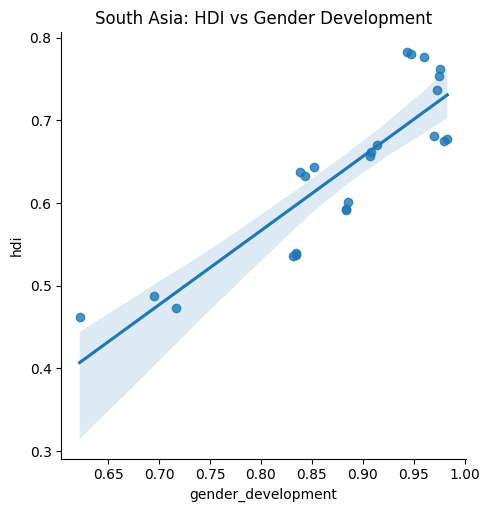

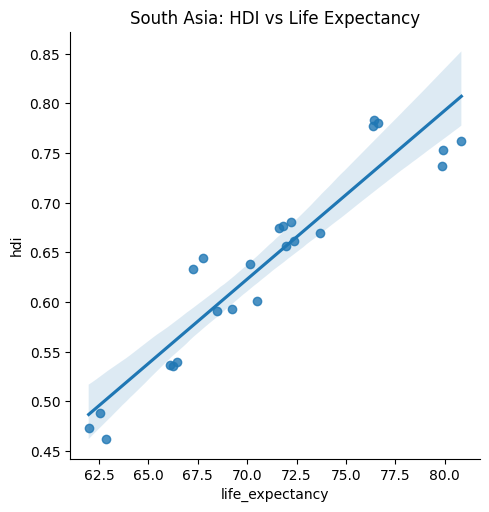

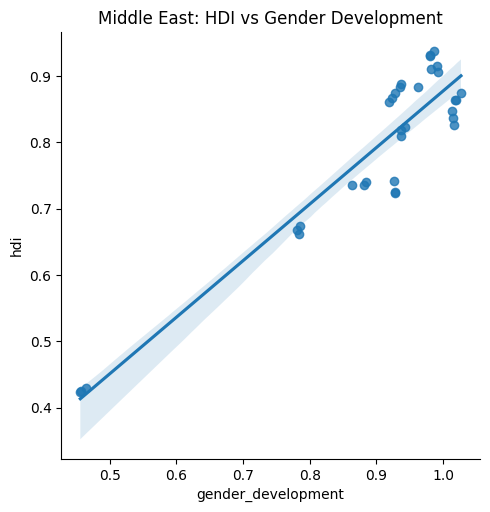

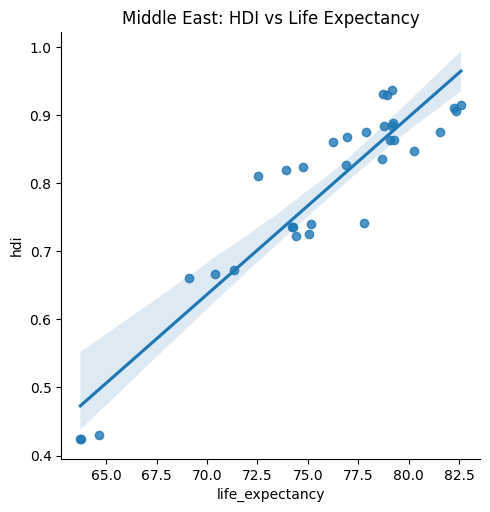

In [85]:
sns.lmplot(x='gender_development', y='hdi', data=south_asia_1b)
plt.title("South Asia: HDI vs Gender Development")
plt.show()

sns.lmplot(x='life_expectancy', y='hdi', data=south_asia_1b)
plt.title("South Asia: HDI vs Life Expectancy")
plt.show()

sns.lmplot(x='gender_development', y='hdi', data=middle_east_1b)
plt.title("Middle East: HDI vs Gender Development")
plt.show()

sns.lmplot(x='life_expectancy', y='hdi', data=middle_east_1b)
plt.title("Middle East: HDI vs Life Expectancy")
plt.show()

Interpret the strength and direction of these relationships.

In both regions, HDI shows a strong positive correlation with life expectancy, indicating that higher health and longevity directly drive human development. The correlation with gender development is weaker but still positive, meaning improvements in gender equality support HDI growth, but not as strongly as health.

Task 7: Outlier Detection (1.5 × IQR)

Detect Outliers (HDI & GNI)

South Asia HDI Outliers:
 Empty DataFrame
Columns: [Unnamed: 0, iso3, country, year, hdi, life_expectancy, pop_millions, hdi_f, hdi_m, life_expec_f, life_expec_m, expec_yr_school, expec_yr_school_f, expec_yr_school_m, mean_yr_school, mean_yr_school_f, mean_yr_school_m, gross_inc_percap, gross_inc_percap_f, gross_inc_percap_m, gender_development, gender_inequality, secondary_education_f_%, secondary_education_m_%, seats_in_parliament_f_%, seats_in_parliament_m_%, labour_participation_f_%, labour_participation_m_%, co2_emission_tons, mat_footprint_percap_tons]
Index: []

[0 rows x 30 columns]
Middle East HDI Outliers:
      Unnamed: 0 iso3 country  year    hdi  life_expectancy  pop_millions  \
576        6367  YEM   Yemen  2020  0.430           64.650     32.284045   
577        6368  YEM   Yemen  2021  0.425           63.753     32.981642   
578        6369  YEM   Yemen  2022  0.424           63.720     33.696614   

        hdi_f     hdi_m  life_expec_f  ...  gender_development  \
576 

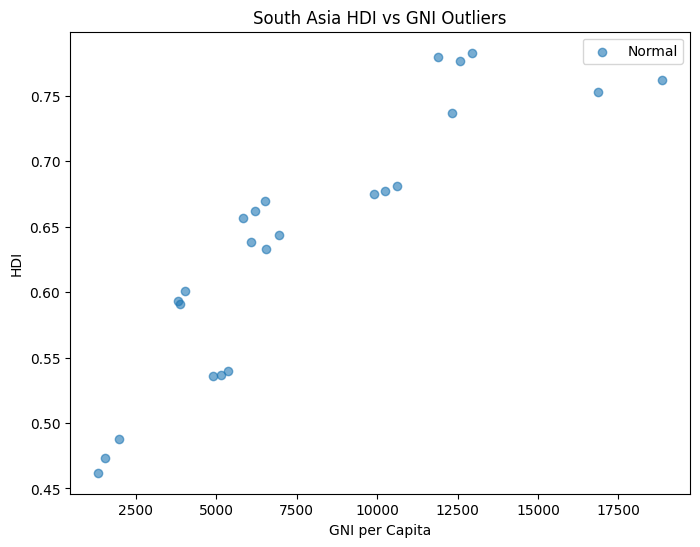

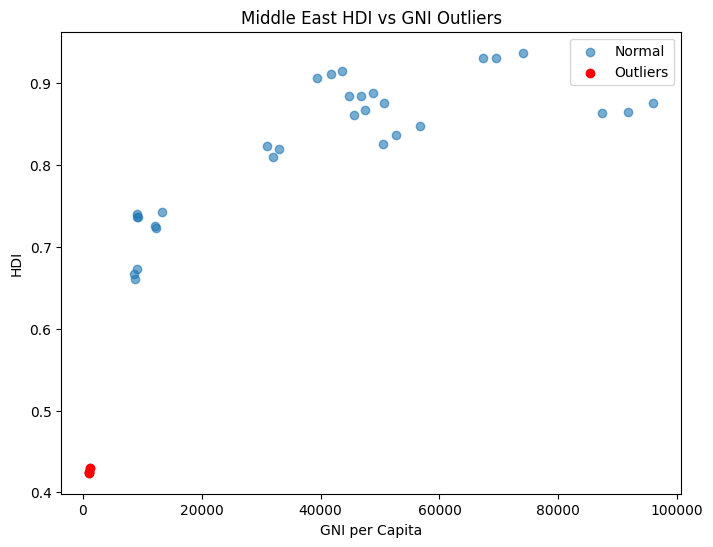

In [88]:
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]

## HDI outliers for South Asia and Middle East
sa_hdi_outliers = detect_outliers(south_asia_1b, 'hdi')
me_hdi_outliers = detect_outliers(middle_east_1b, 'hdi')

# GNI per Capita outliers for South Asia and Middle East
sa_gni_outliers = detect_outliers(south_asia_1b, 'gross_inc_percap')
me_gni_outliers = detect_outliers(middle_east_1b, 'gross_inc_percap')

print("South Asia HDI Outliers:\n", sa_hdi_outliers)
print("Middle East HDI Outliers:\n", me_hdi_outliers)

# --- Scatter Plot for South Asia ---
plt.figure(figsize=(8,6))
# Plot all points from south_asia_1b
plt.scatter(south_asia_1b['gross_inc_percap'], south_asia_1b['hdi'], alpha=0.6, label='Normal')

# Combine HDI and GNI outliers for South Asia and plot them
combined_sa_outliers = pd.concat([sa_hdi_outliers, sa_gni_outliers]).drop_duplicates()
if not combined_sa_outliers.empty:
    plt.scatter(
        combined_sa_outliers['gross_inc_percap'],
        combined_sa_outliers['hdi'],
        color='red',
        label='Outliers'
    )

plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("South Asia HDI vs GNI Outliers")
plt.legend()
plt.show()

# Scatter Plot for Middle East
plt.figure(figsize=(8,6))
# Plot all points from middle_east_1b
plt.scatter(middle_east_1b['gross_inc_percap'], middle_east_1b['hdi'], alpha=0.6, label='Normal')

# Combine HDI and GNI outliers for Middle East and plot them
combined_me_outliers = pd.concat([me_hdi_outliers, me_gni_outliers]).drop_duplicates()
if not combined_me_outliers.empty:
    plt.scatter(
        combined_me_outliers['gross_inc_percap'],
        combined_me_outliers['hdi'],
        color='red',
        label='Outliers'
    )

plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("Middle East HDI vs GNI Outliers")
plt.legend()
plt.show()

Discuss the significance of these outliers.

Outliers highlight countries with unusually high or low HDI or GNI compared to their region. For example, Maldives and Qatar have high income or HDI, while Afghanistan and Yemen lag behind. These cases show that wealth doesn’t always translate into human development and help identify where policy interventions are needed.